In [3]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

from joblib import dump, load

In [2]:
# load embeddings
embeddings = []
with open('embeddings.npy', 'rb') as f:
    embeddings = np.load(f)
    f.close()

In [3]:
embeddings.shape

(1073744, 384)

In [6]:
num_clusters = 15
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(embeddings)
cluster_assignment = clustering_model.labels_

In [7]:
# print size of each cluster
for i in range(num_clusters):
    print(f"Cluster {i}: {len(np.where(cluster_assignment == i)[0])}")

Cluster 0: 42110
Cluster 1: 78094
Cluster 2: 94238
Cluster 3: 51109
Cluster 4: 62656
Cluster 5: 98885
Cluster 6: 119861
Cluster 7: 20141
Cluster 8: 67337
Cluster 9: 87620
Cluster 10: 53232
Cluster 11: 73320
Cluster 12: 71919
Cluster 13: 71937
Cluster 14: 81285


In [15]:
# get sample of data to apply t-SNE
# sample .05 points from each cluster
sample_ratio = 0.01
sample_data = []
sample_cluster_assignments = []
for i in range(num_clusters):
    # grab indices of cluster i
    idx = np.where(cluster_assignment == i)[0]
    
    # sample from indices
    s_idx = np.random.choice(
        idx, int(len(idx) * sample_ratio), replace=False)
    
    # append these embeddings to sample_data
    sample_data.append(embeddings[s_idx])

    # append cluster assignment to sample_cluster_assignments
    sample_cluster_assignments.append(cluster_assignment[s_idx])

sample_data = np.concatenate(sample_data)
sample_cluster_assignments = np.concatenate(sample_cluster_assignments)

print(sample_data.shape, sample_cluster_assignments.shape)

(10731, 384) (10731,)


In [16]:
tsne_model = TSNE(n_components=2, perplexity=15)
tsne_values = tsne_model.fit_transform(sample_data)

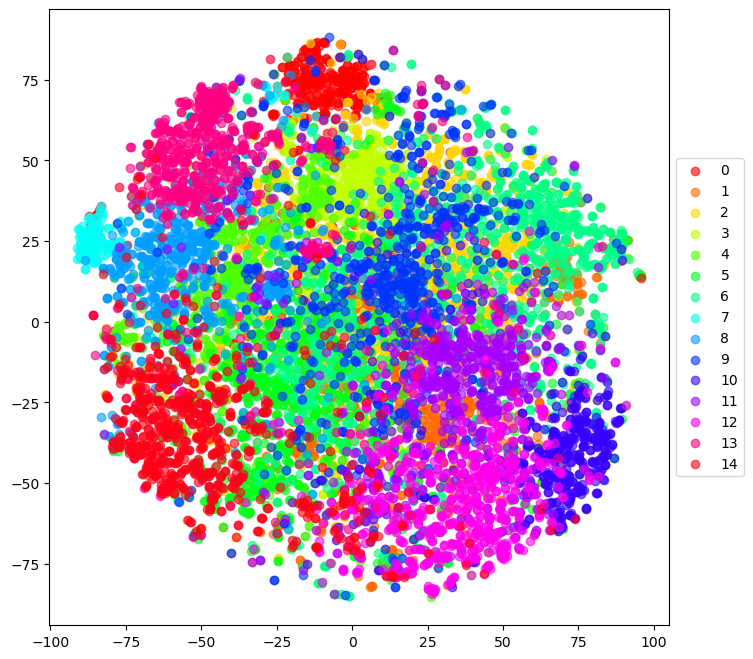

In [18]:
fig, ax = plt.subplots(figsize=(10, 8))

# get colors for each cluster
colors = plt.cm.hsv(np.linspace(0, 1, num_clusters))

for i in range(num_clusters):
    ax.scatter(tsne_values[sample_cluster_assignments == i, 0], 
               tsne_values[sample_cluster_assignments == i, 1], 
               c=[colors[i]], alpha=0.6, label=i)

# put the legend outside the plot
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [19]:
cluster_centers = clustering_model.cluster_centers_
cluster_centers.shape

(15, 384)

In [21]:
dump(clustering_model, 'clustering_model.joblib')

['clustering_model.joblib']

In [4]:
clustering_model = load('clustering_model.joblib')